### Цель лабораторной работы – получение навыков работы с методами регрессии

1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6. Заполните пропущенные значения в данных;
7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

warnings.filterwarnings("ignore")
%matplotlib inline

figsize = (20,10)

In [2]:
data = pd.read_csv("used-cars-database/autos.csv", encoding="ISO-8859-1")

In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### 1 Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

1. dateCrawled: **дата, в которую проводилось сканирование автомобиля, все данные о машинах на этот момент**
2. name: **"имя" автомобиля**
3. seller: **частный или дилер**
4. offerType: **тип предложения**
5. price: **цена объявления о продаже автомобиля**
6. abtest: -
7. vehicleType: **тип двигателя**
8. yearOfRegistration: **в каком году автомобиль был впервые зарегистрирован**
9. gearbox: **коробка передач**
10. powerPS: **мощность машины в PS**
11. fuelType: **тип топлива**
12. model: **модель машины**
13. kilometer: **сколько километров машина проехала**
14. monthOfRegistration: **в каком месяце автомобиль был впервые зарегистрирован**
15. brand: **название выпустившего бренда**
16. notRepairedDamage: **если у автомобиля есть повреждение, которое еще не отремонтировано**
17. dateCreated: **дата, на которую было создано объявление на ebay**
18. nrOfPictures: **количество картинок в объявлении (везде содержит 0 - мусорные данные)**
19. postalCode: - **код почты**
20. lastSeenOnline: **когда сканер видел это объявление в последний раз Поля lastSeen и dateCreated могут быть использованы для оценки того, как долго машина будет находиться в сети, по крайней мере, до ее продажи.**

### 2 Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [5]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [6]:
data.shape

(371528, 20)

In [7]:
data["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [8]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.drop(
    ['dateCrawled', 'seller', 'offerType', 'dateCreated', 'postalCode', 'lastSeen', 'name', 'model', 'nrOfPictures'],
    axis = 1,
    inplace=True
)
data.shape

(260952, 11)

### 3 Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования

In [9]:
numerical_columns = [i for i in data.columns if data[i].dtype.name != 'object']
print("Numerical: " + str(numerical_columns))

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


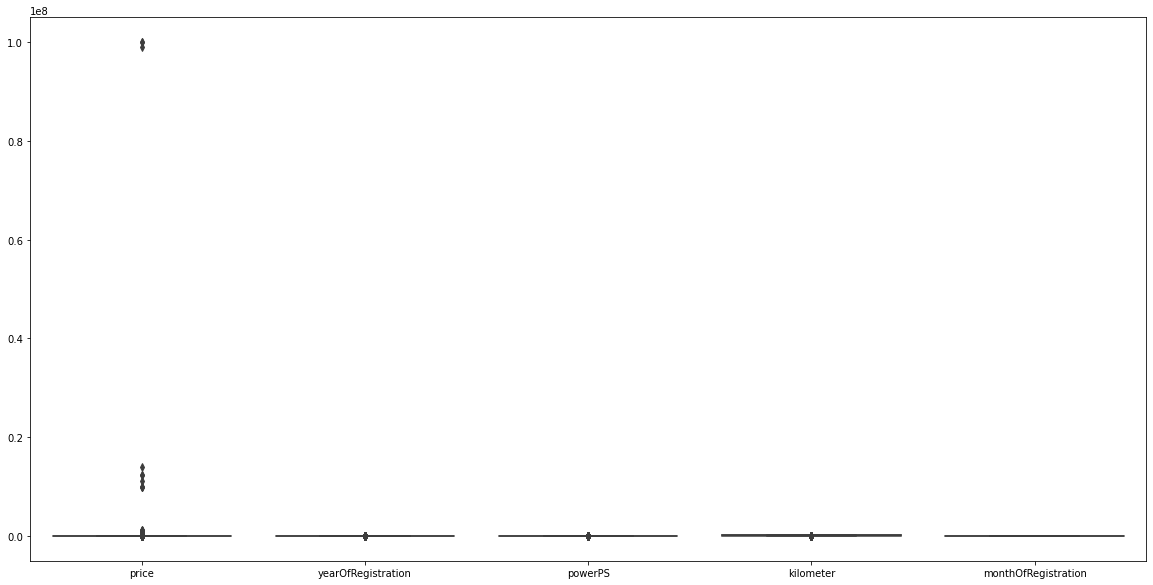

In [10]:
plt.figure(figsize=figsize)
sns.boxplot(data=data[numerical_columns])
plt.show()

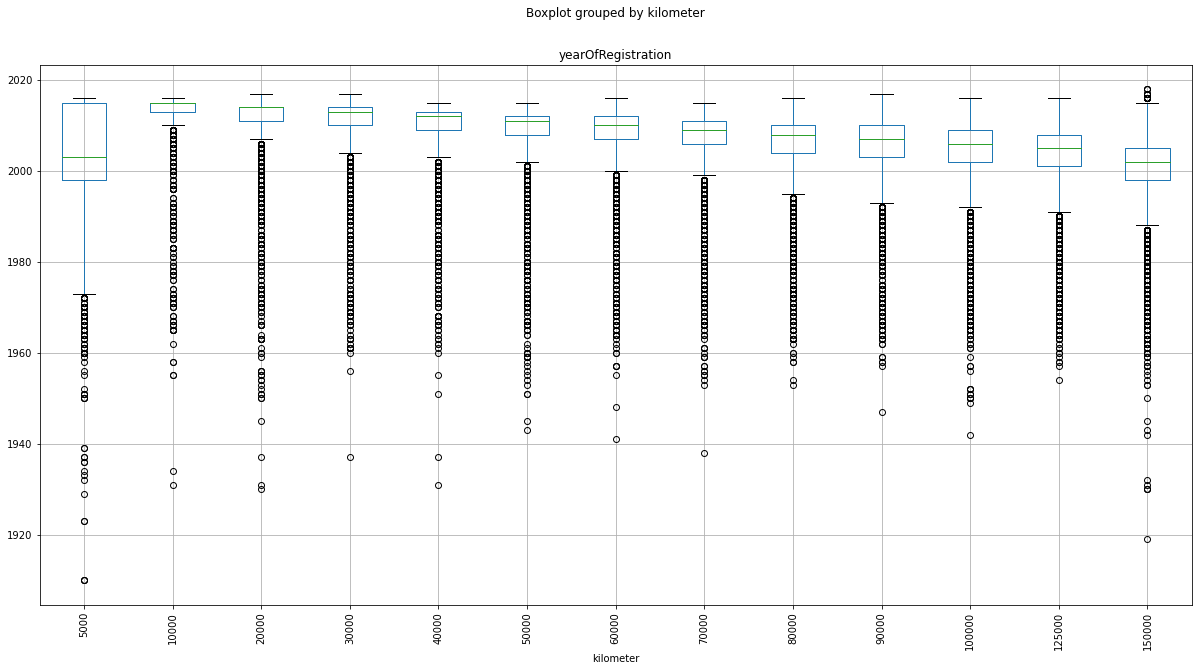

In [11]:
data.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figsize)
plt.show()

In [12]:
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,260952.000000,260952.000000,260952.000000,260952.000000,260952.000000
mean,0.000082,0.863977,0.006317,0.821096,0.515214
std,0.003433,0.060298,0.007264,0.274813,0.289281
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000015,0.824074,0.003900,0.655172,0.250000
50%,0.000039,0.870370,0.005800,1.000000,0.500000
75%,0.000086,0.907407,0.007500,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


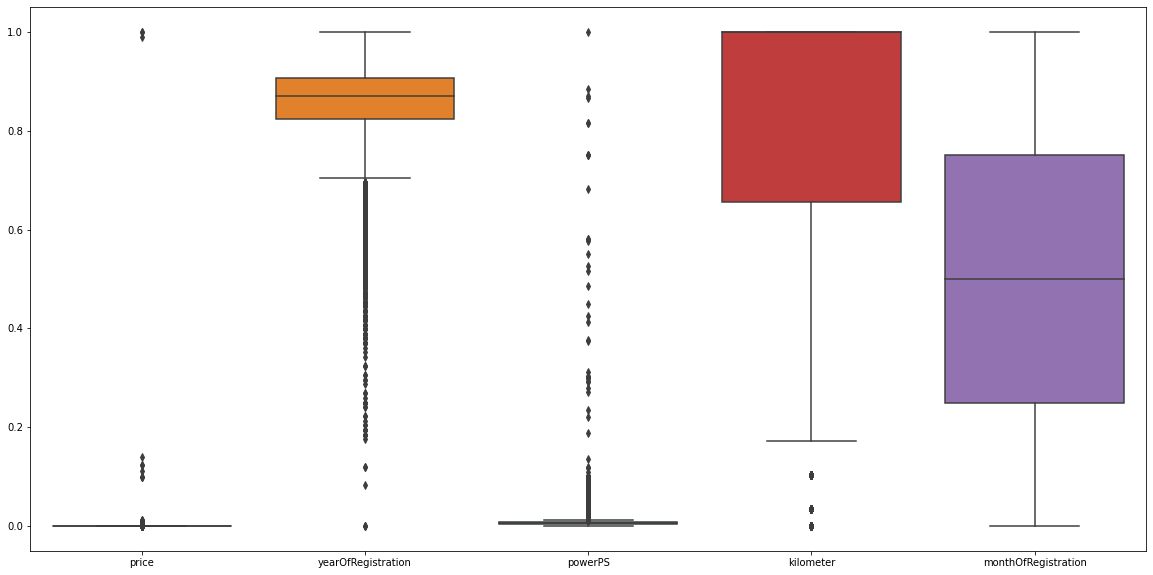

In [13]:
plt.figure(figsize=figsize)
sns.boxplot(data=data[numerical_columns])
plt.show()

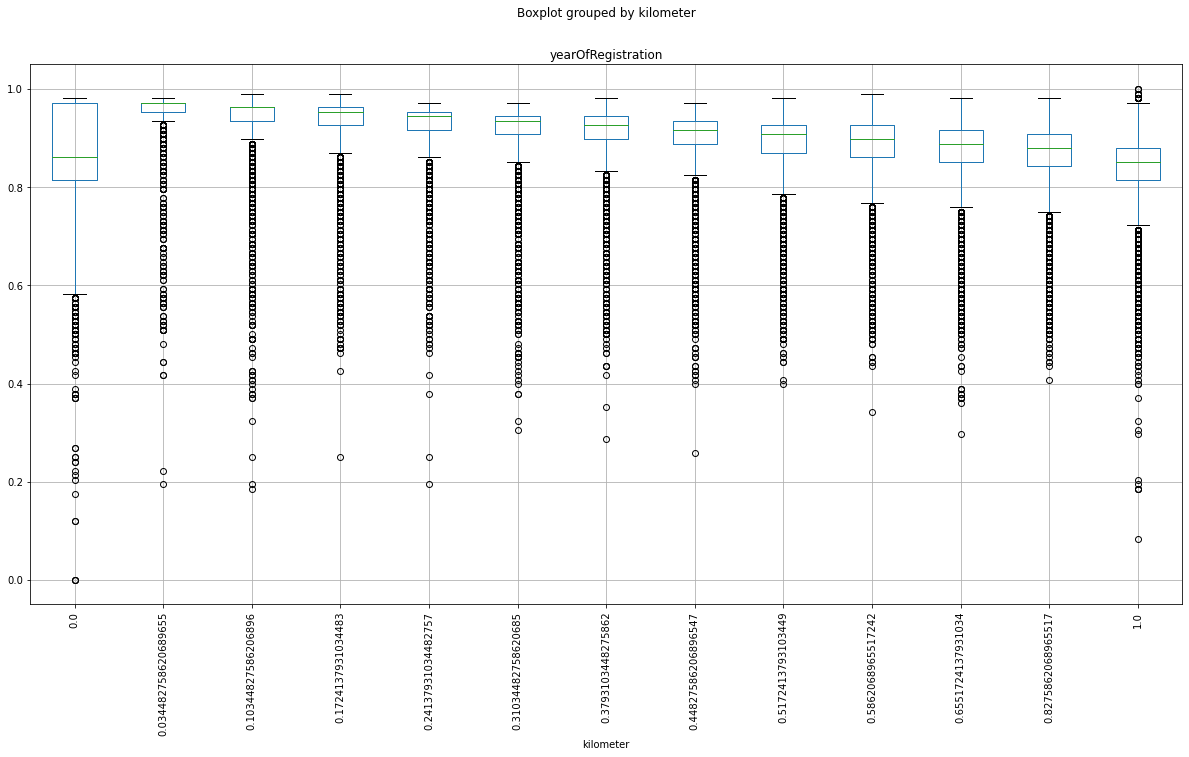

In [14]:
data.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figsize)
plt.show()

### 4 Выполните замену категориальных признаков

In [15]:
categorical_columns = [i for i in data.columns if data[i].dtype.name == 'object']
print("Categorical: " + str(categorical_columns))

Categorical: ['abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [16]:
nonbinary = [column for column in categorical_columns if len(data[column].unique()) > 2]

for column in [column for column in categorical_columns if len(data[column].unique()) == 2]:
    for i, unic_item in enumerate(data[column].unique()):
        data[column] = data[column].replace(to_replace=[unic_item], value=[i])

data_nonbinary = pd.get_dummies(data[nonbinary])
data.drop(nonbinary, axis=1, inplace=True)
data = pd.concat([data_nonbinary, data] , axis=1)

<AxesSubplot:>

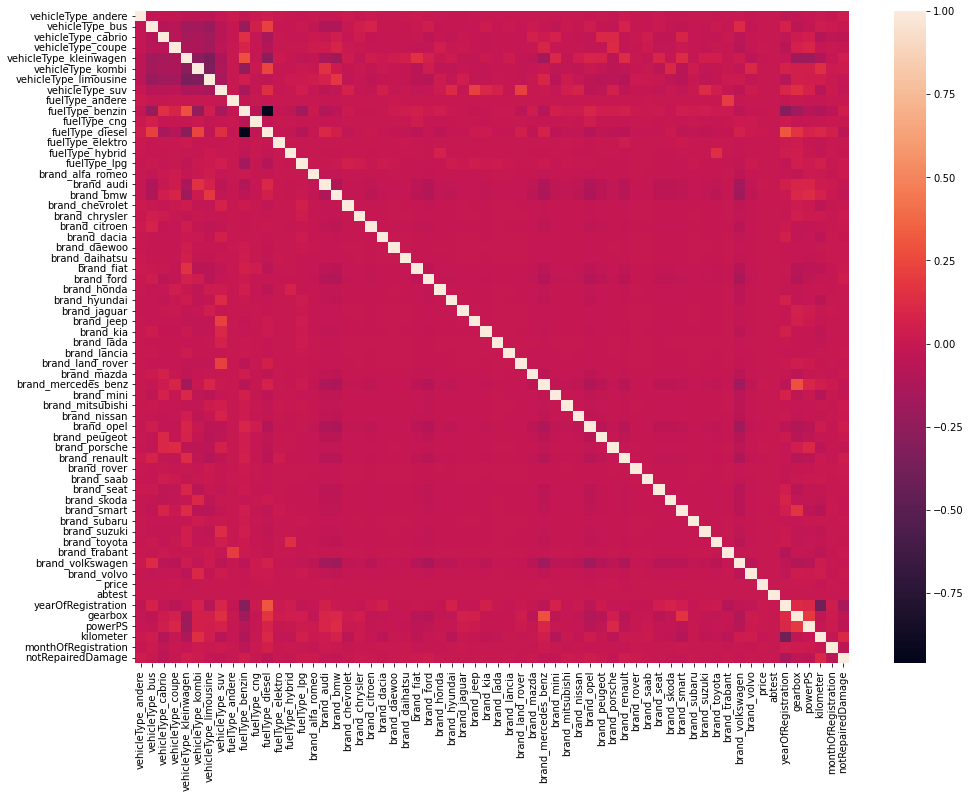

In [18]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, ax=ax)

### 6 Заполните пропущенные значения в данных

In [24]:
data.isnull().sum()[:50]

vehicleType_andere        0
vehicleType_bus           0
vehicleType_cabrio        0
vehicleType_coupe         0
vehicleType_kleinwagen    0
vehicleType_kombi         0
vehicleType_limousine     0
vehicleType_suv           0
fuelType_andere           0
fuelType_benzin           0
fuelType_cng              0
fuelType_diesel           0
fuelType_elektro          0
fuelType_hybrid           0
fuelType_lpg              0
brand_alfa_romeo          0
brand_audi                0
brand_bmw                 0
brand_chevrolet           0
brand_chrysler            0
brand_citroen             0
brand_dacia               0
brand_daewoo              0
brand_daihatsu            0
brand_fiat                0
brand_ford                0
brand_honda               0
brand_hyundai             0
brand_jaguar              0
brand_jeep                0
brand_kia                 0
brand_lada                0
brand_lancia              0
brand_land_rover          0
brand_mazda               0
brand_mercedes_benz 

Пропущенных данных нет

### 7.1 Решите поставленную задачу регрессии в соответствии с заданием.

In [26]:
data_x, data_y = data.drop(['price'], axis=1), data['price']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

138233   -0.000051
252136    0.000007
82359     0.000033
182888   -0.000013
268555   -0.000026
202441    0.000027
49804     0.000045
146772    0.000041
271698    0.000049
298224    0.000121
232237    0.000020
115707   -0.000026
273348    0.000125
195717   -0.000041
180612   -0.000058
Name: price, dtype: float64


In [27]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.11022314321214505 p_value: 4.1921999425743496e-210
Spearman correlation: 0.6473507242449644 p_value: 0.0


### 7.2

In [31]:
reg = Lasso()
params = {'alpha': np.arange(0.05, 3, 0.05)}
reg_grid = GridSearchCV(reg, params, n_jobs=-1)
reg_grid.fit(train_x, train_y)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.05


In [32]:
reg = Lasso(alpha=best_alpha)
reg.fit(train_x,train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

138233   -0.000163
252136    0.000057
82359     0.000070
182888    0.000012
268555    0.000031
202441    0.000007
49804     0.000050
146772    0.000067
271698    0.000029
298224   -0.000063
232237    0.000080
115707    0.000083
273348    0.000073
195717    0.000072
180612   -0.000082
Name: price, dtype: float64


In [33]:
# Корреляция
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: nan p_value: nan
Spearman correlation: nan p_value: nan


### END

In [70]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data[["vehicleType"]])

In [71]:
data_cat_encoded[:10]

array([[nan],
       [ 3.],
       [ 7.],
       [ 4.],
       [ 4.],
       [ 6.],
       [ 2.],
       [ 6.],
       [ 1.],
       [ 4.]])

In [72]:
ordinal_encoder.categories_

[array(['andere', 'bus', 'cabrio', 'coupe', 'kleinwagen', 'kombi',
        'limousine', 'suv', nan], dtype=object)]

In [74]:
data["vehicleTypeENCODE"].value_counts()

6.0    95894
4.0    80023
5.0    67564
1.0    30201
2.0    22898
3.0    19015
7.0    14707
0.0     3357
Name: vehicleTypeENCODE, dtype: int64

<AxesSubplot:>

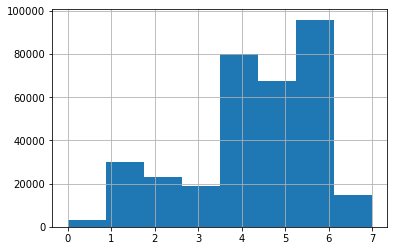

In [75]:
data["vehicleTypeENCODE"].hist(bins=8)

In [76]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.drop(
    ['dateCrawled', 'seller', 'offerType', 'dateCreated', 'postalCode', 'lastSeen', 'name', 'model', 'nrOfPictures'],
    axis = 1,
    inplace=True
)
data.shape

(260952, 12)

In [77]:
data.head(10)

,vehicleTypeENCODE,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,4.0,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,4.0,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
5,6.0,650,test,limousine,1995,manuell,102,150000,10,benzin,bmw,ja
6,2.0,2200,test,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
7,6.0,0,test,limousine,1980,manuell,50,40000,7,benzin,volkswagen,nein
10,6.0,2000,control,limousine,2004,manuell,105,150000,12,benzin,mazda,nein
11,5.0,2799,control,kombi,2005,manuell,140,150000,12,diesel,volkswagen,ja
14,7.0,17999,control,suv,2011,manuell,190,70000,3,diesel,nissan,nein
17,4.0,1750,control,kleinwagen,2004,automatik,75,150000,2,benzin,renault,nein
18,1.0,7550,test,bus,2007,manuell,136,150000,6,diesel,ford,nein


In [83]:
data["fuelType"].value_counts()

benzin     169239
diesel      86973
lpg          3937
cng           460
hybrid        213
andere         73
elektro        57
Name: fuelType, dtype: int64

In [78]:
numerical_columns = [i for i in data.columns if data[i].dtype.name != 'object']
print("Numerical: " + str(numerical_columns))

Numerical: ['vehicleTypeENCODE', 'price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


In [93]:
data_cat = data[["abtest", "gearbox", "fuelType", "brand", "notRepairedDamage"]]

In [95]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<260952x52 sparse matrix of type '<class 'numpy.float64'>'
	with 1304760 stored elements in Compressed Sparse Row format>

In [99]:
data_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [80]:
corr_matrix = data.corr()

In [81]:
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
yearOfRegistration     0.010434
powerPS                0.008640
monthOfRegistration    0.004747
vehicleTypeENCODE     -0.000016
kilometer             -0.013932
Name: price, dtype: float64

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', MinMaxScaler()),
    ])

In [111]:
data.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [112]:
data["notRepairedDamage"].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [116]:
from sklearn.compose import ColumnTransformer

del_attribs = ['dateCrawled', 'seller', 'offerType', 'dateCreated', 'postalCode',
               'lastSeen', 'name', 'model', 'nrOfPictures']
num_attribs = ["price", "yearOfRegistration", "kilometer", "powerPS", "monthOfRegistration"]
cat_attribs = ["abtest", "vehicleType", "notRepairedDamage", "brand", "fuelType", "gearbox"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [117]:
data_prepared = full_pipeline.fit_transform(data)

In [120]:
data_prepared.toarray()

array([[2.23517418e-07, 1.10345594e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.52160156e-06, 1.12345816e-01, 8.27586207e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.56348062e-06, 1.11567952e-01, 8.27586207e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.28408385e-06, 1.10678964e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.58324838e-06, 1.11345705e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.34995207e-05, 1.12568063e-01, 3.10344828e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])